# Diabetes Prediction

Dataset link : 

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
df = pd.read_csv("Diabetes.csv")

# Data Exploration

In [3]:
#Printing the top most 5 data values of dataset
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
#Shape of the data
df.shape

(2000, 9)

In [5]:
#Column names of the data
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#Data type of all the values (columns)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#Information of the data all about dtype, null values, entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
#Statistical Info about data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


<h4>Checking for null values in our dataset.</h4>

In [9]:
#Using the function isna/isnull for finding null values and sum for total no of to get the null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we have seen there are <b>multiple places containing zeros</b> but we know in practicle some attributes for any person can not be zero like gulucose, insulin etc. There should be some value assigned to it.

In [10]:
#Insulin can not be practically zero in any human

np.where(df["Insulin"]==0)

(array([   0,    2,    6,    7,    9,   10,   12,   13,   14,   19,   20,
          22,   23,   27,   28,   30,   31,   34,   36,   37,   38,   41,
          42,   44,   45,   46,   47,   48,   49,   55,   58,   60,   61,
          62,   64,   65,   66,   67,   72,   74,   75,   76,   77,   78,
          79,   80,   81,   83,   84,   86,   89,   90,   93,   96,  100,
         101,  102,  104,  106,  113,  115,  116,  117,  118,  121,  123,
         124,  129,  131,  133,  138,  140,  141,  143,  145,  146,  148,
         149,  151,  154,  155,  160,  163,  164,  166,  167,  168,  170,
         172,  176,  178,  179,  180,  183,  184,  185,  190,  192,  193,
         194,  196,  200,  201,  202,  205,  207,  209,  210,  211,  212,
         218,  219,  221,  222,  226,  227,  230,  233,  235,  237,  238,
         239,  240,  242,  245,  246,  249,  250,  251,  253,  255,  256,
         257,  261,  262,  263,  264,  266,  267,  268,  269,  270,  272,
         274,  276,  278,  280,  283, 

<h3> Visualizaing data for better understanding. </h3>

In [11]:
#Counting the values of different outcome
df["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

Text(0.5, 0, 'Has diabetes')

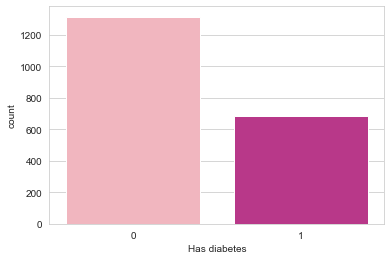

In [12]:
#Plotting count plot for people's diabetes result
sns.countplot(df["Outcome"], palette = "RdPu")
plt.xlabel("Has diabetes")

Text(0.5, 0, 'Age')

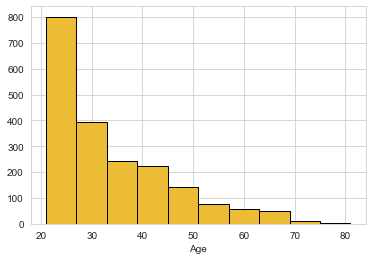

In [13]:
#Plotting the histogram for Age column
plt.hist(df["Age"], color = "#edbc37", edgecolor ="black")
plt.xlabel("Age")

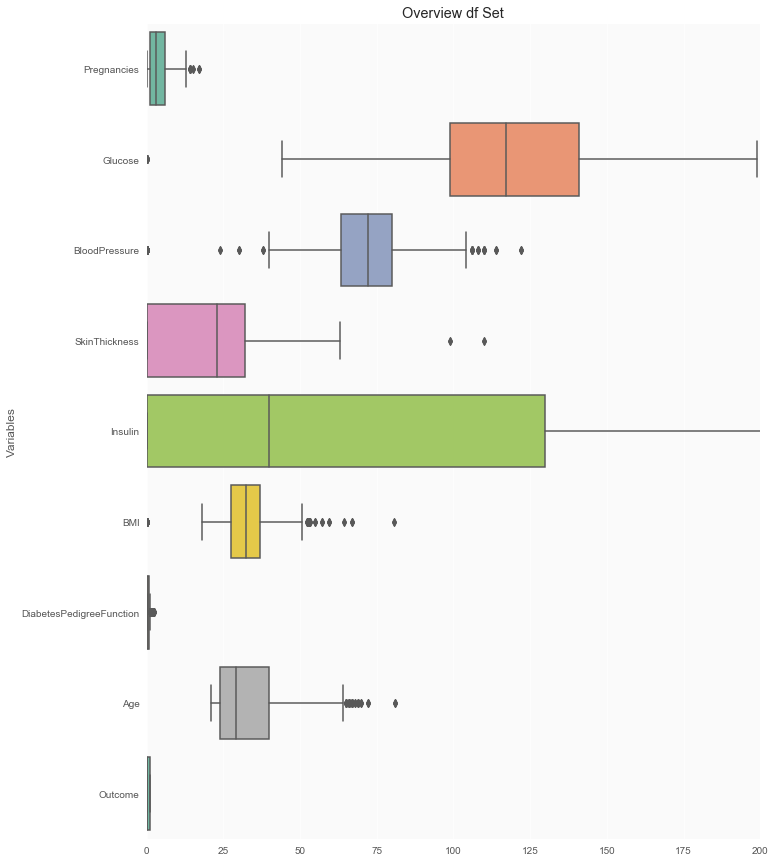

In [14]:
#Using ggplot2 style visuals
plt.style.use('ggplot') 
f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview df Set")
ax = sns.boxplot(data = df, orient = 'h', palette = 'Set2')

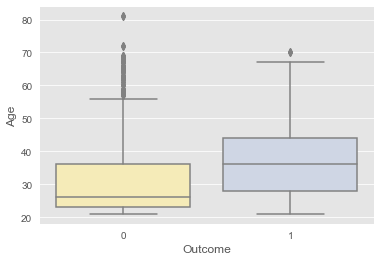

In [15]:
sns.boxplot(x="Outcome", y = "Age" , data = df, palette= "Pastel2_r")

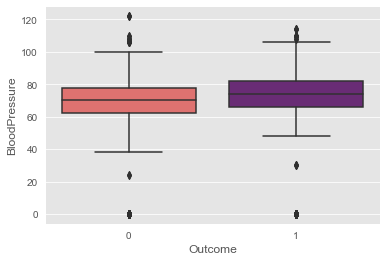

In [16]:
sns.boxplot(x="Outcome", y = "BloodPressure" , data = df, palette= "magma_r")

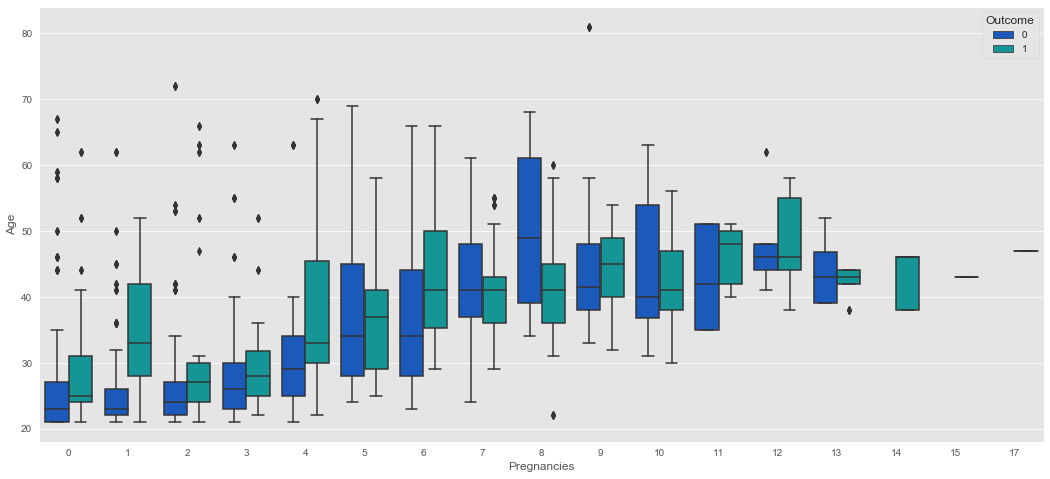

In [17]:
plt.figure(figsize=(18,8))
sns.boxplot(x = "Pregnancies", y = "Age",hue = "Outcome", data = df, palette= "winter")

# Data Cleaning

### Getting the no. of values for attributes having zero as entries.

In [18]:
print("Total numner of rows: ", len(df))
print("Number of rows missing Gulucose : ", len(df[df["Glucose"]==0]))
print("Number of rows missing BloodPressure : ", len(df[df["BloodPressure"]==0]))
print("Number of rows missing SkinThickness : ", len(df[df["SkinThickness"]==0]))
print("Number of rows missing Insulin : ", len(df[df["Insulin"]==0]))
print("Number of rows missing BMI : ", len(df[df["BMI"]==0]))
print("Number of rows missing DiabetesPedigreeFunction : ", len(df[df["DiabetesPedigreeFunction"]==0]))

Total numner of rows:  2000
Number of rows missing Gulucose :  13
Number of rows missing BloodPressure :  90
Number of rows missing SkinThickness :  573
Number of rows missing Insulin :  956
Number of rows missing BMI :  28
Number of rows missing DiabetesPedigreeFunction :  0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009EED11A948>,
      dtype=object)

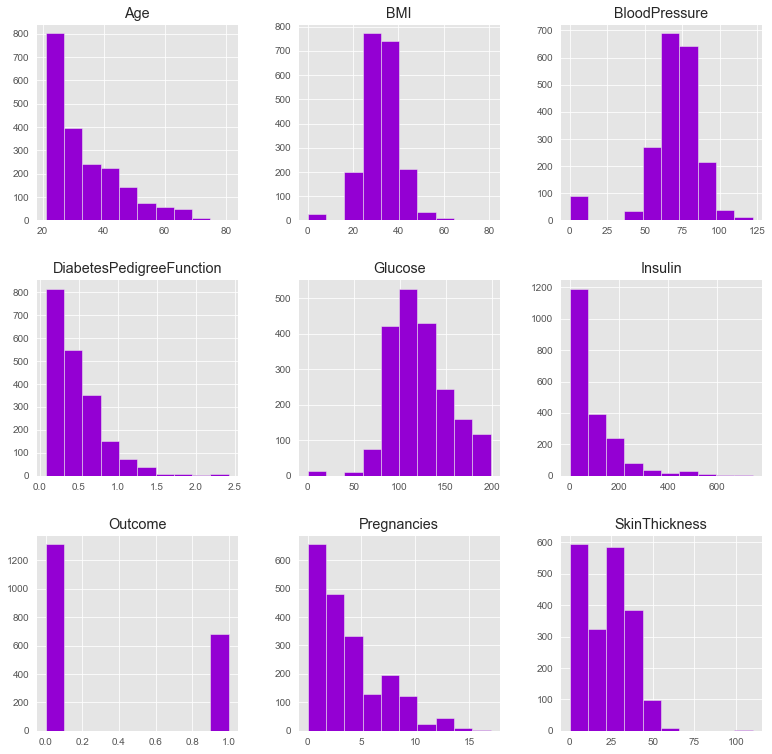

In [19]:
#Histogram of the data having zero as multiple entries
df.hist(color="darkviolet", figsize=(13,13))

In [20]:
Incom_feat = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in Incom_feat:
    df[col].replace(0,df[col].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009EEDD7EA48>,
      dtype=object)

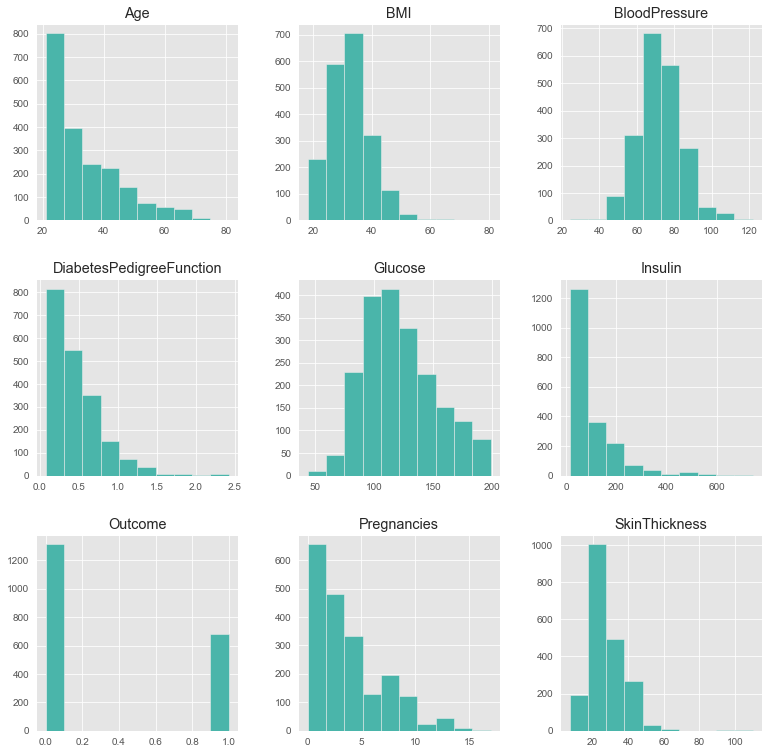

In [21]:
df.hist(color="#4ab5aa", figsize=(13,13))

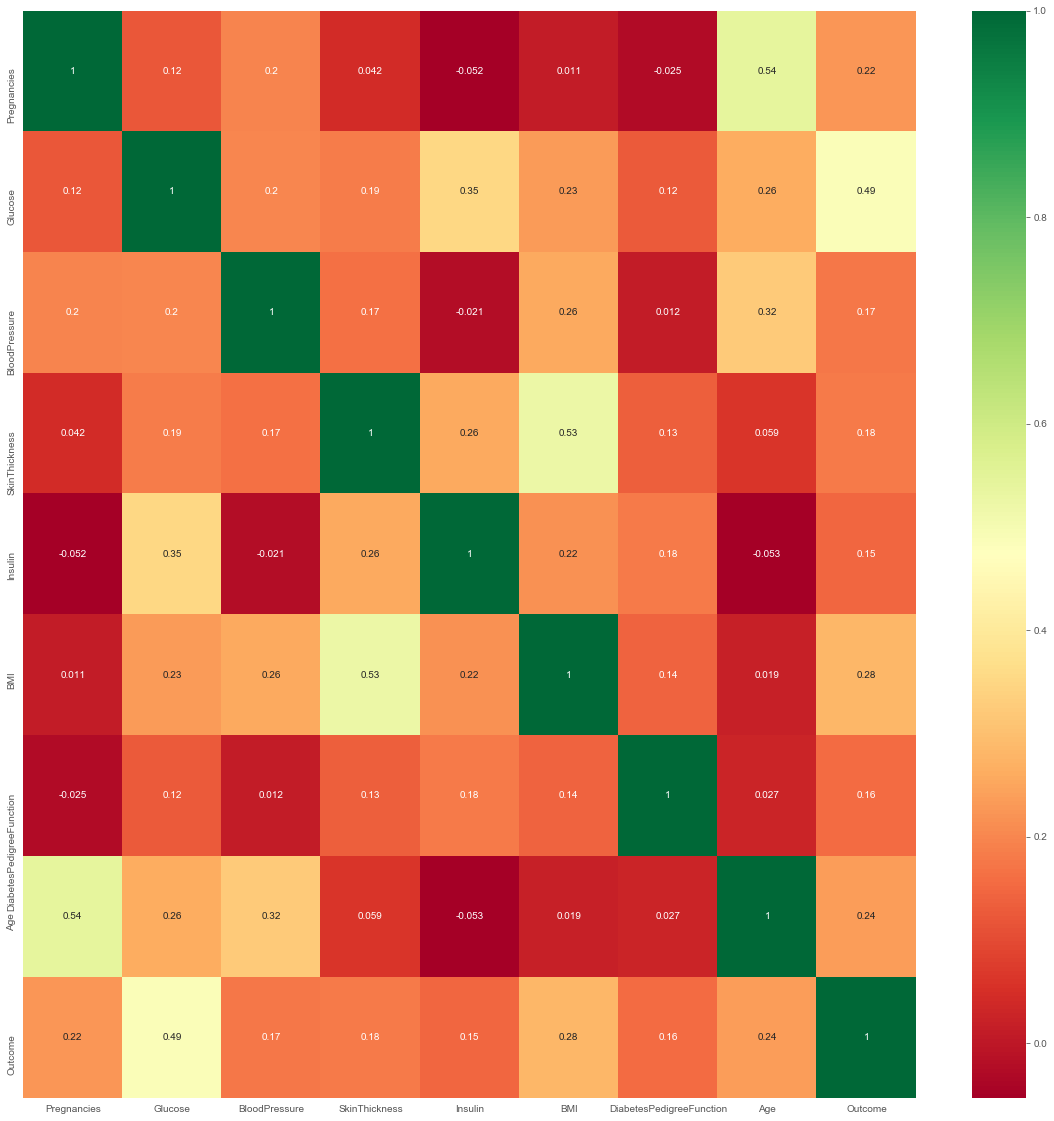

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121727,0.198110,0.042450,-0.052486,0.011404,-0.025453,0.539457,0.224437
Glucose,0.121727,1.000000,0.199815,0.185157,0.353187,0.232912,0.124347,0.260088,0.487712
BloodPressure,0.198110,0.199815,1.000000,0.165234,-0.021063,0.259283,0.012466,0.323659,0.174184
SkinThickness,0.042450,0.185157,0.165234,1.000000,0.255889,0.526836,0.133548,0.059255,0.181365
Insulin,-0.052486,0.353187,-0.021063,0.255889,1.000000,0.217600,0.181461,-0.052681,0.145165
BMI,0.011404,0.232912,0.259283,0.526836,0.217600,1.000000,0.142019,0.018731,0.282515
DiabetesPedigreeFunction,-0.025453,0.124347,0.012466,0.133548,0.181461,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.260088,0.323659,0.059255,-0.052681,0.018731,0.026569,1.000000,0.236509
Outcome,0.224437,0.487712,0.174184,0.181365,0.145165,0.282515,0.155459,0.236509,1.000000


In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,40,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,72,23,40,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Model Building

In [25]:
# Train test split

from sklearn.model_selection import train_test_split

y = df[["Outcome"]]
X = df.drop("Outcome", axis = 1)

X_train, X_test, train_Y, test_Y = train_test_split(X, y , test_size = 0.30, random_state = 10)

print("X_train size : ", X_train.shape)
print("X_test size : ", X_test.shape)

X_train size :  (1400, 8)
X_test size :  (600, 8)


In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [27]:
#Using GridSearchCV to find the best algorithm for the problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [28]:
#Finding the best model for the problem

def Best_Model(X,y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

Best_Model(X_train, train_Y)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.753571
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.915714
2,random_forest,{'n_estimators': 50},0.940714
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.871429


In [29]:
#Using cross_val_score for gaining average accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, train_Y, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 93.0%


In [30]:
#Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Model Evaluation and Prediction

In [31]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
Predicted_Y = classifier.predict(X_test)
Conf_Mat = confusion_matrix(test_Y, Predicted_Y)
Conf_Mat

array([[388,  10],
       [ 17, 185]], dtype=int64)

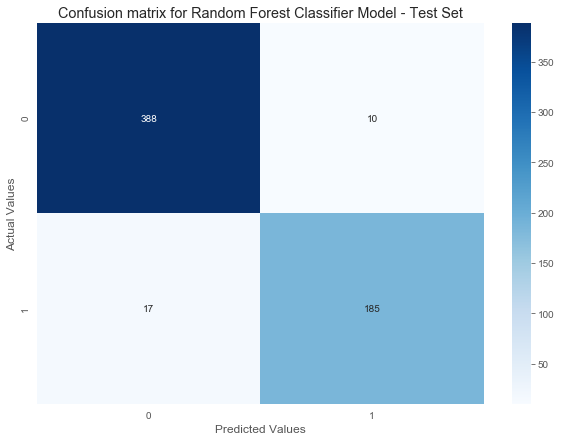

In [32]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(Conf_Mat, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [33]:
#Accuracy Score
score = round(accuracy_score(test_Y, Predicted_Y),4)*100
print("Accuracy on test set:",score)

Accuracy on test set: 95.5


In [34]:
#Classification Report
print(classification_report(test_Y, Predicted_Y))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       398
           1       0.95      0.92      0.93       202

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [35]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
Conf_Mat = confusion_matrix(train_Y, y_train_pred)
Conf_Mat

array([[918,   0],
       [  0, 482]], dtype=int64)

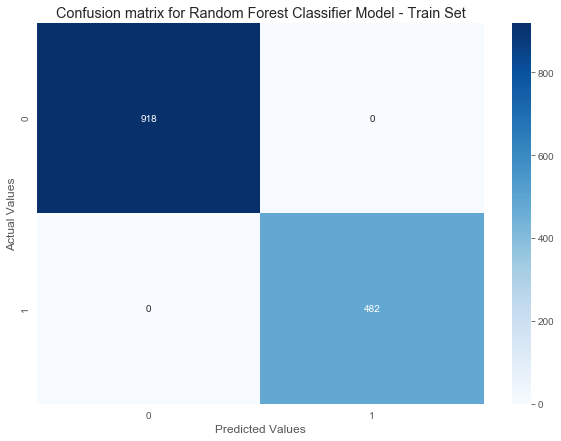

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(Conf_Mat, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [37]:
#Accuracy Score
score = round(accuracy_score(train_Y, y_train_pred),4)*100
print("Accuracy on trainning set:",score)

Accuracy on trainning set: 100.0


In [38]:
#Classification Report
print(classification_report(train_Y, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       482

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



## Prediction Function

In [39]:
#Creating a function for prediction
def Predict_Diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = Scaler.transform(x)

    return classifier.predict(x)

In [40]:
#Example
#Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = Predict_Diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Diabetes test *Positive*.')
else:
  print("Diabetes test *Negative*.")

Diabetes test *Negative*.
